In [1]:
import scanpy as sc
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:

# Create sample data
np.random.seed(42)  # for reproducibility


DATA_PATH = '/om/group/abugoot/Projects/Omnicell_datasets/DEGs_Essential_Genes.json' 


with open(DATA_PATH, 'r') as f:
    data = json.load(f)



In [3]:
data.keys()



dict_keys(['jurkat', 'hepg2', 'k562', 'rpe1'])

In [5]:
# 1. First, check your memory usage
import psutil
import os

def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"Memory usage: {process.memory_info().rss / 1024 / 1024 / 1024:.2f} GB")

def check_swap_usage():
    swap = psutil.swap_memory()
    print(f"Swap used: {swap.used / 1024 / 1024 / 1024:.2f} GB")
    print(f"Swap total: {swap.total / 1024 / 1024 / 1024:.2f} GB")
    
def print_system_memory():
    vm = psutil.virtual_memory()
    print(f"Total RAM: {vm.total / 1024 / 1024 / 1024:.2f} GB")
    print(f"Available RAM: {vm.available / 1024 / 1024 / 1024:.2f} GB")
    print(f"Used RAM: {vm.used / 1024 / 1024 / 1024:.2f} GB")
    print(f"RAM Usage Percentage: {vm.percent}%")
    
print_system_memory()
check_swap_usage()

print_memory_usage()

Total RAM: 503.61 GB
Available RAM: 434.96 GB
Used RAM: 45.65 GB
RAM Usage Percentage: 13.6%
Swap used: 4.00 GB
Swap total: 4.00 GB
Memory usage: 40.45 GB


In [10]:

data['k562']['NAF1']

pd.DataFrame.from_dict(data['k562']['NAF1'], orient='index')

,scores,pvals_adj,lfc
NAF1,-6.132826,0.000010,-2.420829
RPL3,-5.004738,0.003330,-0.252607
MT-ND1,4.609026,0.016057,0.202007
RPL10A,-4.010252,0.180552,-0.196712
DEF6,3.804987,0.337710,1.069095
...,...,...,...
DLX1,0.000000,1.000000,0.000000
PHF21B,0.000000,1.000000,0.000000
DLK1,0.000000,1.000000,0.000000
PHKA2,0.000000,1.000000,0.000000


In [29]:

data_significant_degs = {}
for cell_line, perts in data.items():

    number_DEGS = []
    print(cell_line)
    for pert, DEGs in perts.items():
        if DEGs is None:
            print(f"Cell line: {cell_line}, Pert: {pert} has no DEGs")
            number_DEGS.append(0)

        else:
            try:
                df = pd.DataFrame.from_dict(DEGs, orient='index')
            except:
                print(f"Cell line: {cell_line}, Pert: {pert} threw an error, DEGs: {DEGs}")
                raise ValueError('Error')
                

            df_significant = df[df['pvals_adj'] < 0.05]
            number_DEGS.append(len(df_significant))
    data_significant_degs[cell_line] = number_DEGS
            


jurkat
Cell line: jurkat, Pert: NUP155 has no DEGs
hepg2
k562
rpe1


In [32]:


test_data = {
    'K562\nGenomeWide': np.random.lognormal(2, 1, 1000),
    'K562\nEssential': np.random.lognormal(2, 0.5, 1000),
    'RPE1\nEssential': np.random.lognormal(2, 0.6, 1000),
    'Jurkat\nEssential': np.random.lognormal(2, 0.4, 1000),
    'HepG2\nEssential': np.random.lognormal(2, 0.7, 1000)
}


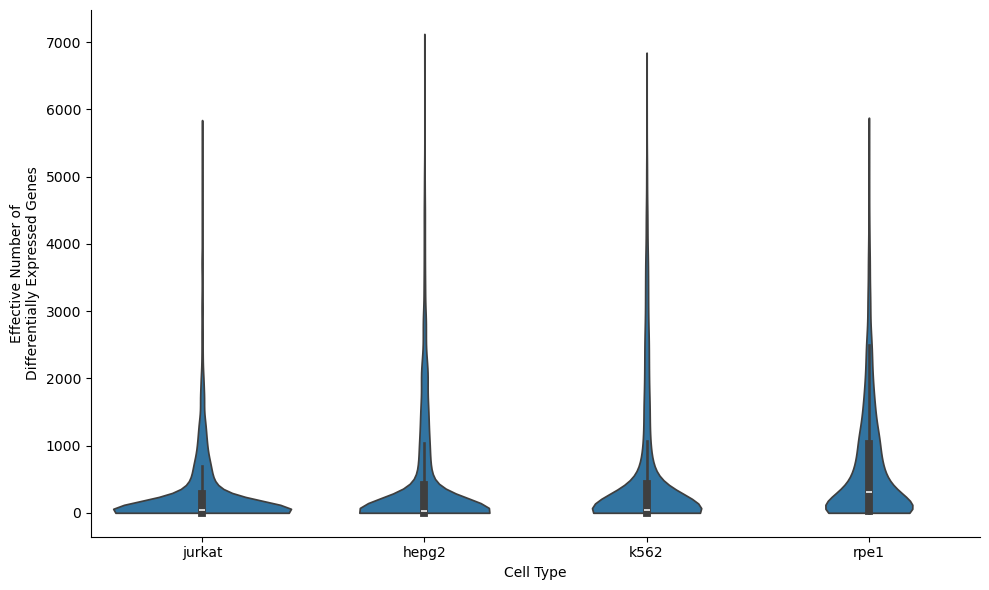

In [35]:


# Convert to long format DataFrame
df = pd.DataFrame({
    'Cell Type': np.repeat(list(data_significant_degs.keys()), [len(v) for v in data_significant_degs.values()]),
    'Expression': np.concatenate(list(data_significant_degs.values()))
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cell Type', y='Expression', cut=0)

# Set y-axis to log scale
plt.yscale('linear')
plt.ylabel('Effective Number of\nDifferentially Expressed Genes')
plt.xticks(rotation=0)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()